# Big Data (UBA) -  2024

## Trabajo Práctico 2

### Fecha de entrega:
<font color='red'> Viernes 8 de Noviembre a las 13:00 hs </font>

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada **TP2**. Este Jupyter Notebook y el correspondiente al **TP2** deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [3]:
# Resolver acá
import pandas as pd
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/main/TP2/Base%20Airbnb%20NY.csv"

# Cargar los datos en un DataFrame
df = pd.read_csv(url)

# Visualizar las primeras filas para verificar la carga correcta
#print(df.head())

# Verificar valores duplicados
duplicados = df.duplicated().sum()
#print(f"Número de filas duplicadas: {duplicados}")

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Verificar las columnas del DataFrame
#print(df.columns)

# Eliminar columnas irrelevantes (ejemplo, si hay columnas como 'id' o 'host_name')
columnas_a_eliminar = ['id',"host_id", 'host_name',"name","neighbourhood","last_review"]  # Modifica según las columnas que no sean de interés
df = df.drop(columns=columnas_a_eliminar)

# Verificar valores faltantes
#print(df.isnull().sum())

# Justificación de la eliminación de valores nulos en 'price':
# Se eliminan las filas con valores nulos en la columna 'price' porque representan solo 15 casos en casi 48,000 registros.
# Esto es insignificante (<0.05%) y permite mantener la coherencia en los análisis numéricos y comparativos,
# sin afectar la integridad general del conjunto de datos.

# Eliminar filas con valores nulos en la columna 'price'
df = df.dropna(subset=['price'])

# Justificación de la imputación de 'reviews_per_month':
# Los valores nulos en 'reviews_per_month' se imputan como 0, ya que reflejan propiedades sin reseñas,
# manteniendo la lógica de que no se recibieron comentarios en esas propiedades.

# Imputar valores nulos en 'reviews_per_month' con 0
df['reviews_per_month'].fillna(0, inplace=True)

# Ver la información general del DataFrame, incluyendo el tipo de dato y valores no nulos
#print(df.info())

# Ver un resumen estadístico de las columnas numéricas
#print(df.describe())

# Calcular el IQR y los límites para la columna 'price'
Q1_precio = df['price'].quantile(0.25)
Q3_precio = df['price'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

limite_inferior_precio = Q1_precio - 1.5 * IQR_precio
limite_superior_precio = Q3_precio + 1.5 * IQR_precio

# Eliminar outliers en 'price'
# Decisión: Se eliminan los valores que están fuera de 1.5 veces el rango intercuartil (IQR) para asegurar que los datos utilizados sean representativos
# de la mayoría de los listados, evitando distorsiones causadas por precios extremadamente bajos o altos que pueden afectar los análisis.
# Aunque el límite inferior no suele importar tanto, se incluye para mantener la consistencia y prolijidad del proceso.
df = df[(df['price'] >= limite_inferior_precio) & (df['price'] <= limite_superior_precio)]

# Calcular el IQR y los límites para la columna 'minimum_nights'
Q1_min_noches = df['minimum_nights'].quantile(0.25)
Q3_min_noches = df['minimum_nights'].quantile(0.75)
IQR_min_noches = Q3_min_noches - Q1_min_noches

limite_inferior_min_noches = Q1_min_noches - 1.5 * IQR_min_noches
limite_superior_min_noches = Q3_min_noches + 1.5 * IQR_min_noches

# Eliminar outliers en 'minimum_nights'
# Decisión: Se aplicó el mismo criterio de IQR para 'minimum_nights' con el fin de excluir valores inusualmente altos o bajos que pueden no
# representar la realidad de los alquileres típicos y podrían sesgar el análisis.
# Aunque el límite inferior no sea tan relevante, se incluye para mantener la coherencia en el proceso de eliminación de outliers.
df = df[(df['minimum_nights'] >= limite_inferior_min_noches) & (df['minimum_nights'] <= limite_superior_min_noches)]

# Eliminar registros con valores negativos en 'availability_365'
# Decisión: Los valores negativos en 'availability_365' se eliminan porque no tienen sentido lógico en el contexto de disponibilidad de propiedades.
df = df[df['availability_365'] >= 0]

# Verificar el resultado de la limpieza
#print(df.describe())

# Ver las categorías únicas en 'neighbourhood_group' y 'room_type'
print("Categorías únicas en 'neighbourhood_group':")
print(df['neighbourhood_group'].unique())

print("\nCategorías únicas en 'room_type':")
print(df['room_type'].unique())

# Crear nuevas columnas con códigos numéricos para las variables categóricas
df['neighbourhood_group_code'] = df['neighbourhood_group'].astype('category').cat.codes
df['room_type_code'] = df['room_type'].astype('category').cat.codes

# Imprimir los códigos asignados a cada categoría
print("Códigos de 'neighbourhood_group':")
print(dict(enumerate(df['neighbourhood_group'].astype('category').cat.categories)))

print("\nCódigos de 'room_type':")
print(dict(enumerate(df['room_type'].astype('category').cat.categories)))

# Crear una nueva columna 'offer_group' que contiene la cantidad de oferentes por 'neighbourhood_group'
df_offer_group = df.groupby('neighbourhood_group').size().reset_index(name='offer_group')
df = df.merge(df_offer_group, on='neighbourhood_group', how='left')

# Verificar el resultado de la limpieza
#print(df.describe())

# Crear una copia del DataFrame original
df_copia = df.copy()

# Renombrar las columnas en español en la copia del DataFrame
df_copia.rename(columns={
    'neighbourhood_group': 'Barrio',
    'neighbourhood_group_code': 'Barrio (num)',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'room_type': 'Tipo de Habitación',
    'room_type_code': 'Tipo de Habitación (num)',
    'price': 'Precio',
    'minimum_nights': 'Noches Mínimas',
    'number_of_reviews': 'Número de Reseñas',
    'reviews_per_month': 'Reseñas por Mes',
    'calculated_host_listings_count': 'Cantidad de Listados por Anfitrión',
    'availability_365': 'Disponibilidad 365'
}, inplace=True)


Categorías únicas en 'neighbourhood_group':
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Categorías únicas en 'room_type':
['Private room' 'Entire home/apt' 'Shared room']
Códigos de 'neighbourhood_group':
{0: 'Bronx', 1: 'Brooklyn', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island'}

Códigos de 'room_type':
{0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'}


<ipython-input-3-d350896eaf88>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación. También , tenga encuenta

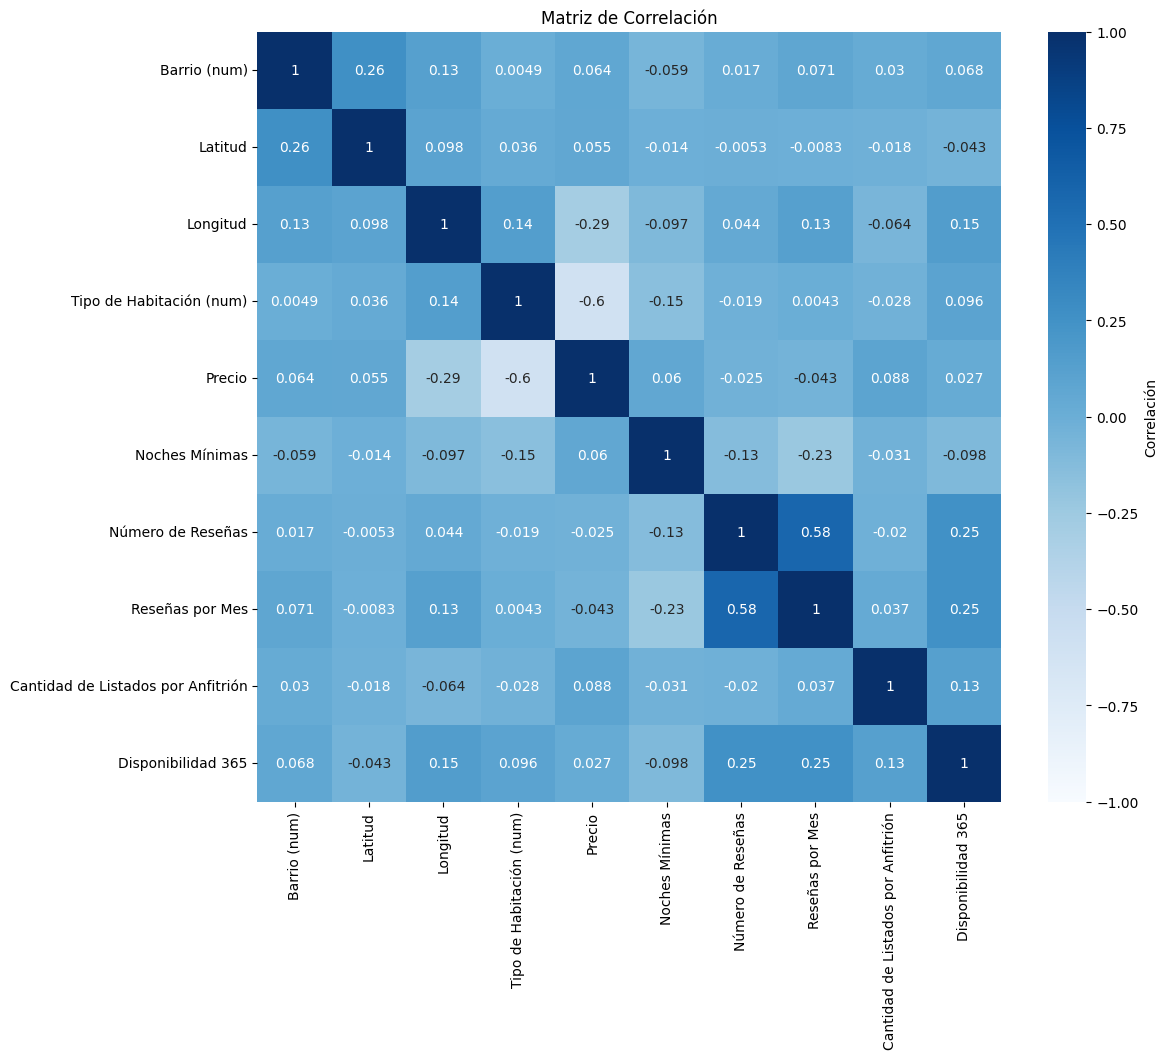

In [4]:
# Resolver acá
import matplotlib.pyplot as plt
import seaborn as sns

# Remapear 'Barrio' a los valores de más rico a más pobre (tal vez relacionado con el precio)
neighbourhood_mapping = {
    'Manhattan': 0,
    'Brooklyn': 1,
    'Queens': 2,
    'Staten Island': 3,
    'Bronx': 4
}

# Verificar si 'Barrio' es categórico y mapearlo
if df_copia['Barrio (num)'].dtype.name == 'category' or df_copia['Barrio (num)'].dtype == 'object':
    df_copia['Barrio (num)'] = df_copia['Barrio (num)'].map(neighbourhood_mapping)

# Convertir 'Tipo de Habitación' a numérico si es necesario
if df_copia['Tipo de Habitación (num)'].dtype.name == 'category' or df_copia['Tipo de Habitación (num)'].dtype == 'object':
    df_copia['Tipo de Habitación (num)'] = df_copia['Tipo de Habitación (num)'].astype('category').cat.codes

# Generar la matriz de correlación
# Seleccionar las columnas para la matriz de correlación
cols_corr = ['Barrio (num)', 'Latitud', 'Longitud', 'Tipo de Habitación (num)', 'Precio', 'Noches Mínimas',
             'Número de Reseñas', 'Reseñas por Mes', 'Cantidad de Listados por Anfitrión', 'Disponibilidad 365']

# Calcular la matriz de correlación
correlation_matrix = df_copia[cols_corr].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación')
plt.show()



#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Proporción de oferentes por Barrio:
Barrio
Brooklyn         43.650374
Manhattan        40.301176
Queens           12.646370
Bronx             2.535821
Staten Island     0.866259
Name: proportion, dtype: float64


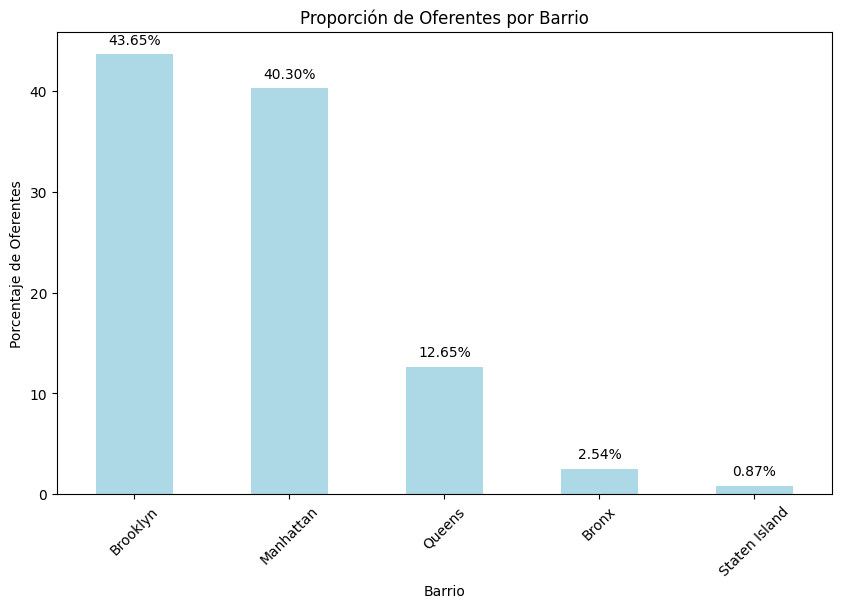

Proporción por Tipo de Habitación:
Tipo de Habitación
Habitación Privada         49.986150
Casa/Apartamento Entero    47.520838
Habitación Compartida       2.493012
Name: proportion, dtype: float64


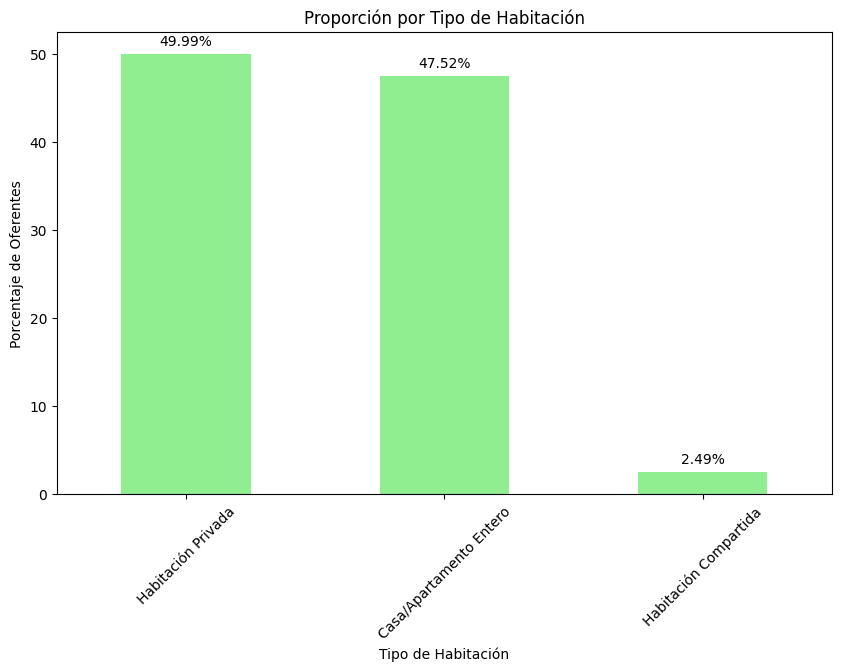

In [5]:
# Resolver acá


# Modificar los valores de la columna 'Tipo de Habitación' a español
df_copia['Tipo de Habitación'] = df_copia['Tipo de Habitación'].replace({
    'Private room': 'Habitación Privada',
    'Entire home/apt': 'Casa/Apartamento Entero',
    'Shared room': 'Habitación Compartida'
})

# Calcular la proporción de oferentes por 'Barrio'
proporcion_barrio = df_copia['Barrio'].value_counts(normalize=True) * 100
print("Proporción de oferentes por Barrio:")
print(proporcion_barrio)

# Graficar la proporción de oferentes por 'Barrio'
plt.figure(figsize=(10, 6))
proporcion_barrio.plot(kind='bar', color='lightblue')
plt.title('Proporción de Oferentes por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Porcentaje de Oferentes')
plt.xticks(rotation=45)

# Mostrar el valor sobre cada barra
for i, v in enumerate(proporcion_barrio):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.show()

# Calcular la proporción por 'Tipo de Habitación'
proporcion_tipo_habitacion = df_copia['Tipo de Habitación'].value_counts(normalize=True) * 100
print("Proporción por Tipo de Habitación:")
print(proporcion_tipo_habitacion)

# Graficar la proporción por 'Tipo de Habitación'
plt.figure(figsize=(10, 6))
proporcion_tipo_habitacion.plot(kind='bar', color='lightgreen')
plt.title('Proporción por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Porcentaje de Oferentes')
plt.xticks(rotation=45)

# Mostrar el valor sobre cada barra
for i, v in enumerate(proporcion_tipo_habitacion):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.show()

# Comentario sobre los resultados:
# Los barrios de Brooklyn y Manhattab tienen casi 84% de los oferentes. Queens esta tercero siendo casi la totalidad del resto.
# Las proporciones de habitaciones privadas y departamentos completos son similares, siendo el de habitacion compartida un valor muy bajo.


#### Ejercicio 4
Realicen un histograma y función de kernel de los precios de los alojamientos. Comenten el gráfico obtenido, las decisiones de ancho de banda y función de kernel seleccionada. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?

Mejor ancho de banda: 33.68421052631579


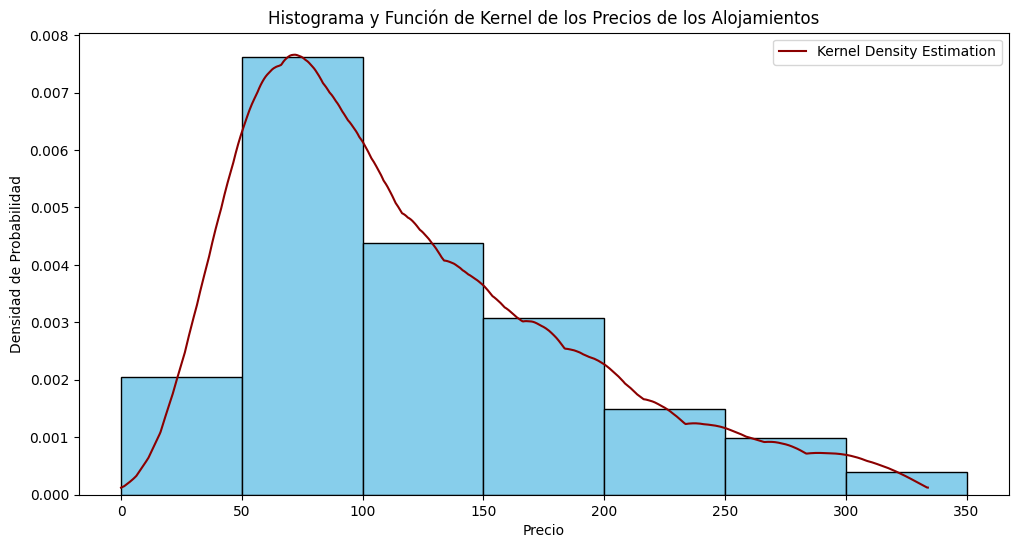

Precio mínimo: $0.0
Precio máximo: $334.0
Precio promedio: $119.01

Media de precio por Barrio:
Barrio
Bronx             77.964250
Brooklyn         107.048690
Manhattan        143.920395
Queens            91.131023
Staten Island     89.520349
Name: Precio, dtype: float64

Media de precio por Tipo de Habitación:
Tipo de Habitación
Casa/Apartamento Entero    162.154788
Habitación Compartida       62.037374
Habitación Privada          80.826650
Name: Precio, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Variable para modificar el ancho de banda del histograma
bins_histograma = 50
#Parece que los oferentes prefieren dejar sus precios casi siempre en multiplos de 50
# Selección del kernel
kernel_elegido = "epanechnikov"  # Explicación: Epanechnikov se elige por su menor sesgo y mejor ponderación de los puntos cercanos al centro.

# Preparar los datos de precios para el KDE
precios = df_copia['Precio'].values[:, np.newaxis]

# Usar GridSearchCV para encontrar el mejor ancho de banda
#params = {'bandwidth': np.linspace(30, 100, 20)}
#kde_model = GridSearchCV(KernelDensity(kernel=kernel_elegido), param_grid=params, cv=5)
#kde_model.fit(precios)

# Mejor ancho de banda encontrado
#mejor_ancho_banda = kde_model.best_params_['bandwidth']
#print(f"Mejor ancho de banda: {mejor_ancho_banda}")
mejor_ancho_banda = 33.68421052631579 #obtuve el ancho de banda y lo escribo asi es mas rapido el codigo
# Aplicar el mejor ancho de banda al KDE
kde = KernelDensity(kernel=kernel_elegido, bandwidth=mejor_ancho_banda).fit(precios)

# Crear un rango de valores para evaluar la densidad
x_densidad = np.linspace(precios.min(), precios.max(), 1000)[:, np.newaxis]
densidad_log = kde.score_samples(x_densidad)

# Graficar el histograma y la función de kernel
plt.figure(figsize=(12, 6))
plt.hist(df_copia['Precio'], bins=range(0, int(df_copia['Precio'].max()) + bins_histograma, bins_histograma), color='skyblue', edgecolor='black', density=True)
plt.plot(x_densidad, np.exp(densidad_log), color='darkred', label='Kernel Density Estimation')
plt.title('Histograma y Función de Kernel de los Precios de los Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()


# Precio mínimo, máximo y promedio
precio_min = df_copia['Precio'].min()
precio_max = df_copia['Precio'].max()
precio_promedio = df_copia['Precio'].mean()

print(f"Precio mínimo: ${precio_min}")
print(f"Precio máximo: ${precio_max}")
print(f"Precio promedio: ${precio_promedio:.2f}")

# Media de precio por 'Barrio'
media_precio_barrio = df_copia.groupby('Barrio')['Precio'].mean()
print("\nMedia de precio por Barrio:")
print(media_precio_barrio)

# Media de precio por 'Tipo de Habitación'
media_precio_tipo_habitacion = df_copia.groupby('Tipo de Habitación')['Precio'].mean()
print("\nMedia de precio por Tipo de Habitación:")
print(media_precio_tipo_habitacion)

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

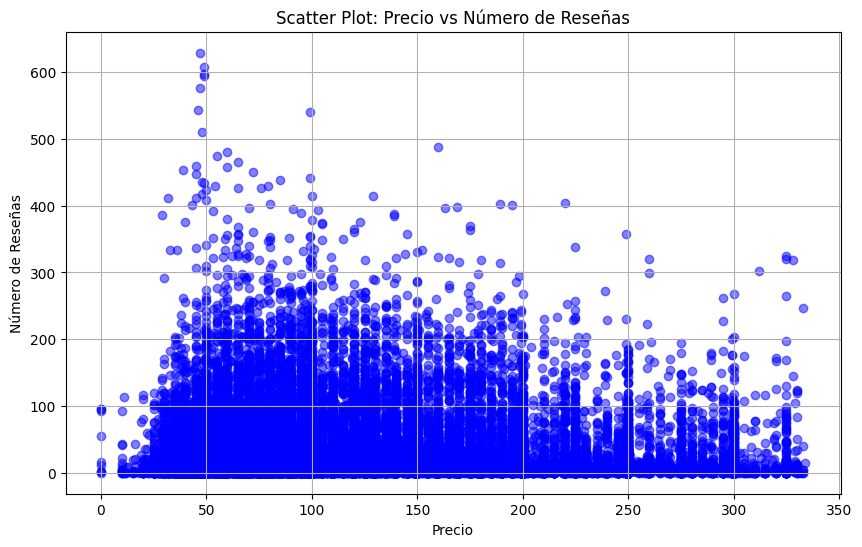

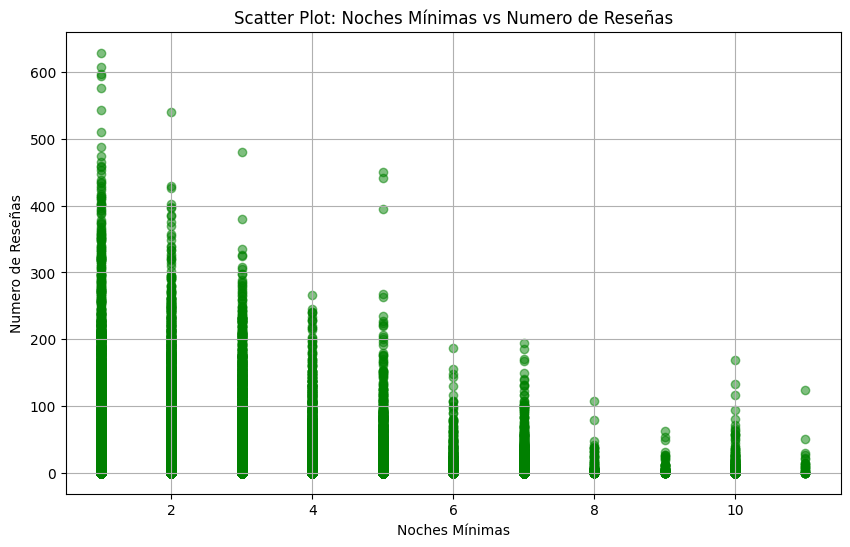

In [13]:
# Resolver acá
# Scatter plot 1: Precio vs Número de Reseñas
plt.figure(figsize=(10, 6))
plt.scatter(df_copia['Precio'], df_copia['Número de Reseñas'], alpha=0.5, c='blue')
plt.title('Scatter Plot: Precio vs Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.grid(True)
plt.show()

# Comentario:
# Este scatter plot permite observar si existe una relación entre el precio de los alojamientos y el número de reseñas recibidas.
#Parece que si hay cierto efecto entre ambas


# Scatter plot 2: Precio vs Disponibilidad 365
plt.figure(figsize=(10, 6))
plt.scatter(df_copia['Noches Mínimas'], df_copia['Número de Reseñas'], alpha=0.5, c='green')
plt.title('Scatter Plot: Noches Mínimas vs Numero de Reseñas')
plt.xlabel('Noches Mínimas')
plt.ylabel('Numero de Reseñas')
plt.grid(True)
plt.show()

# Comentario:
# Este scatter plot ayuda a visualizar si los precios de los alojamientos están relacionados con la cantidad de días disponibles al año.
# Puede revelar tendencias como si los alojamientos más caros están más o menos reservados (es decir, si tienen una menor disponibilidad).


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las *ponderaciones* (o *loadings*) de las variables en dos dimensiones (biplot con flechas). Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [ ]:
# Resolver acá


### Parte III: Predicción y Validación

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal, generen un una tabla para presentar las estimaciones de los coeficientes y comenten los resultados obtenidos.

In [ ]:
# Resolver acá


#### Ejercicio 10: Predicción afuera de la muestra
Calcule el Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), y el Error Absoluto Medio (MAE) en la base de entrenamiento y testeo (usando coeficientes estimados con la base de entrenamiento). Presente los resultados en una tabla y comente las diferencias de calcular estas medidas de bondad de ajuste adentro y afuera de la muestra